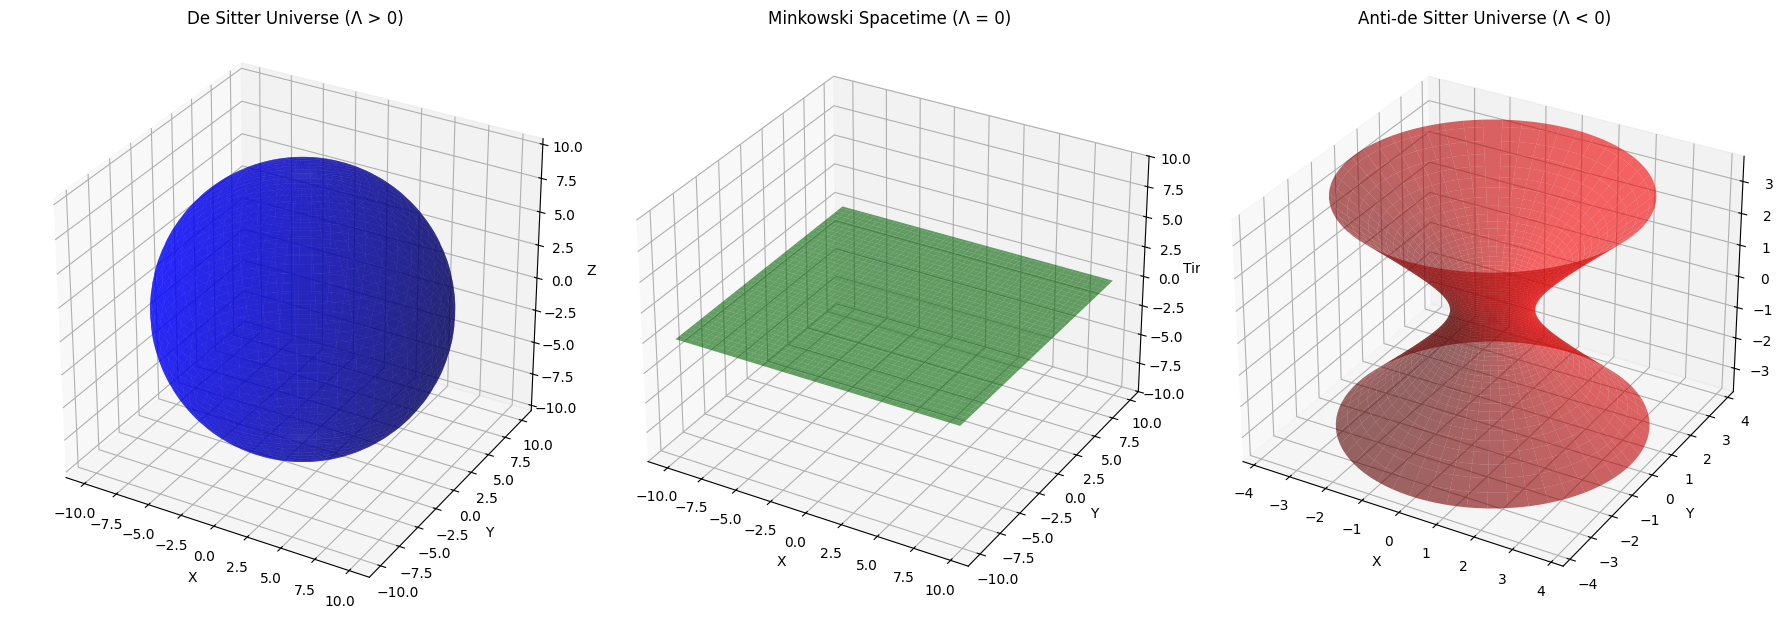

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure to hold the subplots
fig = plt.figure(figsize=(18, 6))

# --- 1. De Sitter Universe (Λ > 0) ---
# Represents a universe with positive curvature, like a sphere.
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('De Sitter Universe (Λ > 0)')

# Parametric equations for a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax1.plot_surface(x, y, z, color='b', alpha=0.6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_aspect('equal')


# --- 2. Minkowski Spacetime (Λ = 0) ---
# Represents a flat universe.
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Minkowski Spacetime (Λ = 0)')

# Create a flat plane
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

ax2.plot_surface(X, Y, Z, color='g', alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Time')
ax2.set_zlim(-10, 10)


# --- 3. Anti-de Sitter Universe (Λ < 0) ---
# Represents a universe with negative curvature, like a saddle.
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Anti-de Sitter Universe (Λ < 0)')

# Parametric equations for a hyperboloid (saddle shape)
u = np.linspace(-2, 2, 100)
v = np.linspace(0, 2 * np.pi, 100)
U, V = np.meshgrid(u, v)
X = np.cosh(U) * np.cos(V)
Y = np.cosh(U) * np.sin(V)
Z = np.sinh(U)


ax3.plot_surface(X, Y, Z, color='r', alpha=0.6)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

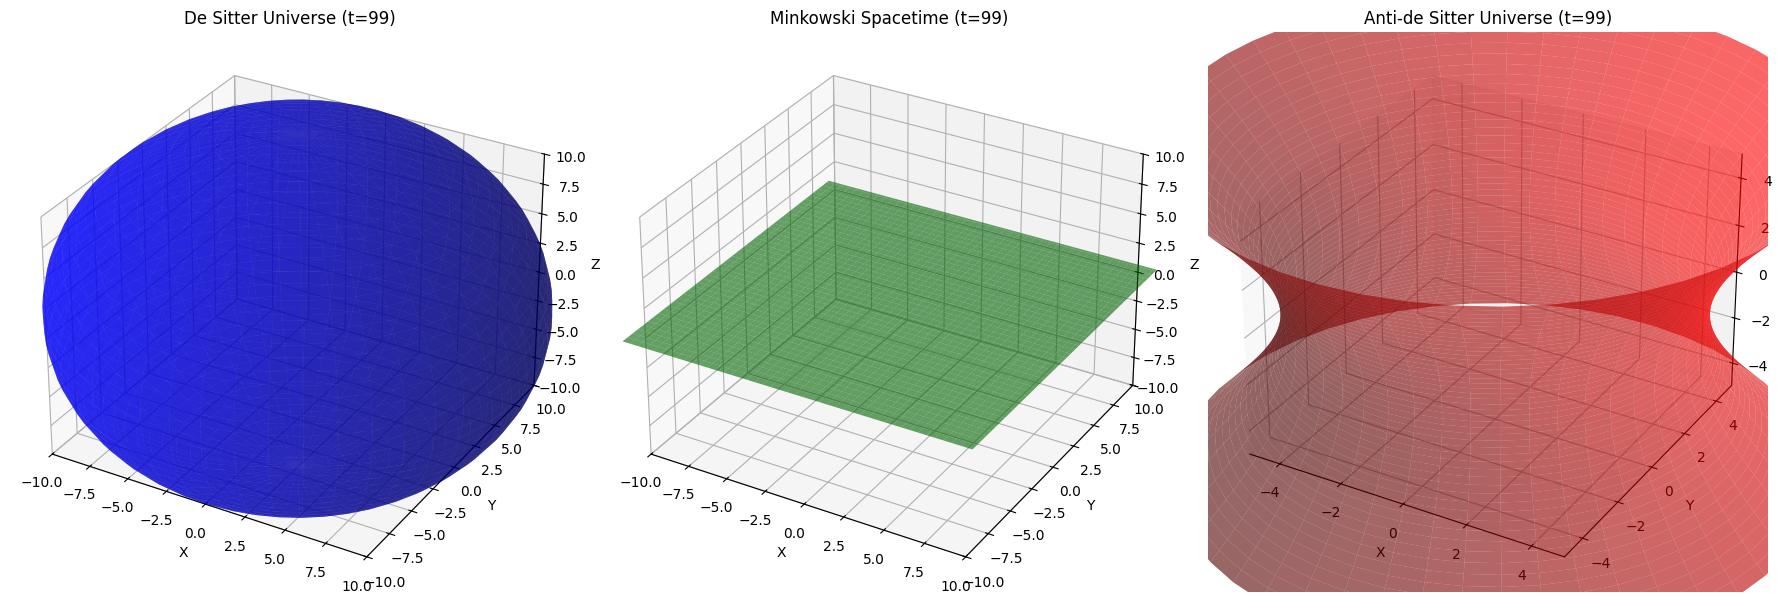

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# --- Setup the Figure and Subplots ---
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Set titles for each subplot
ax1.set_title('De Sitter Universe (Λ > 0)')
ax2.set_title('Minkowski Spacetime (Λ = 0)')
ax3.set_title('Anti-de Sitter Universe (Λ < 0)')

# --- Initial Data Generation ---

# 1. De Sitter (Sphere)
u_sphere = np.linspace(0, 2 * np.pi, 50)
v_sphere = np.linspace(0, np.pi, 50)
x_sphere = np.outer(np.cos(u_sphere), np.sin(v_sphere))
y_sphere = np.outer(np.sin(u_sphere), np.sin(v_sphere))
z_sphere = np.outer(np.ones(np.size(u_sphere)), np.cos(v_sphere))
de_sitter_plot = [ax1.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.6)]

# 2. Minkowski (Plane)
x_plane = np.arange(-1, 1, 0.1)
y_plane = np.arange(-1, 1, 0.1)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = np.zeros(X_plane.shape)
minkowski_plot = [ax2.plot_surface(X_plane, Y_plane, Z_plane, color='g', alpha=0.6)]

# 3. Anti-de Sitter (Hyperboloid)
u_hyper = np.linspace(-1, 1, 50)
v_hyper = np.linspace(0, 2 * np.pi, 50)
U_hyper, V_hyper = np.meshgrid(u_hyper, v_hyper)
x_hyper = np.cosh(U_hyper) * np.cos(V_hyper)
y_hyper = np.cosh(U_hyper) * np.sin(V_hyper)
z_hyper = np.sinh(U_hyper)
ads_plot = [ax3.plot_surface(x_hyper, y_hyper, z_hyper, color='r', alpha=0.6)]


def init():
    """Initializes the background of each plot."""
    # Set axis labels
    for ax in [ax1, ax2, ax3]:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    # Set consistent axis limits
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.set_zlim(-10, 10)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)
    ax2.set_zlim(-10, 10)
    ax3.set_xlim(-5, 5)
    ax3.set_ylim(-5, 5)
    ax3.set_zlim(-5, 5)

    return de_sitter_plot[0], minkowski_plot[0], ads_plot[0]


def update(frame):
    """Update function for the animation."""
    # The scale factor 'a' represents the expansion of the universe over time.
    # We use an exponential factor for de Sitter and linear for the others for visual clarity.
    a_desitter = 0.1 * np.exp(frame / 20)
    a_minkowski = 1 + frame * 0.1
    a_ads = 1 + frame * 0.05

    # --- Update De Sitter Universe ---
    # Remove the old plot
    de_sitter_plot[0].remove()
    # Plot the new, scaled sphere
    de_sitter_plot[0] = ax1.plot_surface(a_desitter * x_sphere, a_desitter * y_sphere, a_desitter * z_sphere, color='b', alpha=0.6)

    # --- Update Minkowski Spacetime ---
    minkowski_plot[0].remove()
    # Create new scaled grid
    x_plane_new = np.arange(-a_minkowski, a_minkowski, 0.1)
    y_plane_new = np.arange(-a_minkowski, a_minkowski, 0.1)
    if len(x_plane_new) < 2 or len(y_plane_new) < 2: # Ensure grid is valid
        x_plane_new = y_plane_new = np.array([-a_minkowski, a_minkowski])

    X_plane_new, Y_plane_new = np.meshgrid(x_plane_new, y_plane_new)
    Z_plane_new = np.zeros(X_plane_new.shape)
    minkowski_plot[0] = ax2.plot_surface(X_plane_new, Y_plane_new, Z_plane_new, color='g', alpha=0.6)

    # --- Update Anti-de Sitter Universe ---
    ads_plot[0].remove()
    # Plot the new, scaled hyperboloid
    ads_plot[0] = ax3.plot_surface(a_ads * x_hyper, a_ads * y_hyper, a_ads * z_hyper, color='r', alpha=0.6)

    # Set titles to show the current time/frame
    ax1.set_title(f'De Sitter Universe (t={frame})')
    ax2.set_title(f'Minkowski Spacetime (t={frame})')
    ax3.set_title(f'Anti-de Sitter Universe (t={frame})')

    return de_sitter_plot[0], minkowski_plot[0], ads_plot[0]

# --- Create and run the animation ---
# The animation will run for 100 frames. `interval` is the delay between frames in milliseconds.
ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=False, interval=50)

# To save the animation, you might need ffmpeg installed.
ani.save('spacetime_expansion.mp4', writer='ffmpeg')

plt.tight_layout()
plt.show()

Saving animation... This may take a moment.
Animation saved successfully as smooth_universe_evolution.mp4


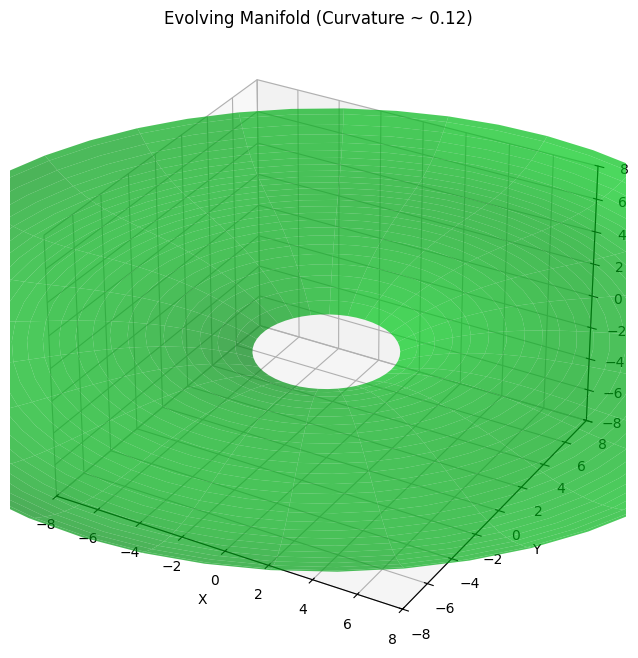

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import random

# --- Setup the Figure and a Single Subplot ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# --- Global State for the Manifold ---
# A common parameter grid for all shapes
u_grid, v_grid = np.mgrid[0:2*np.pi:50j, 0:1:50j]

# These globals will store the current vertex coordinates of our evolving manifold
X_coords, Y_coords, Z_coords = None, None, None

# Overall expansion scale of the universe
global_scale = 1.0

# --- Base Geometry Functions ---
# These functions define the pure geometric shapes on our common grid.

def get_sphere_coords(u, v):
    """Returns the coordinates for a unit sphere."""
    phi = v * np.pi
    x = np.sin(phi) * np.cos(u)
    y = np.sin(phi) * np.sin(u)
    z = np.cos(phi)
    return x, y, z

def get_plane_coords(u, v):
    """Returns the coordinates for a flat disk of radius 2."""
    r = 2 * v
    x = r * np.cos(u)
    y = r * np.sin(u)
    z = np.zeros_like(x)
    return x, y, z

def get_hyperboloid_coords(u, v):
    """Returns the coordinates for a hyperboloid."""
    z_val = (v - 0.5) * 3  # Map v from [0,1] to [-1.5, 1.5]
    r = 1 + np.cosh(z_val) / 2 # Create a waist
    x = r * np.cos(u)
    y = r * np.sin(u)
    z = np.sinh(z_val)
    return x, y, z

# --- Pre-calculate Base Shapes for Efficiency ---
X_sphere, Y_sphere, Z_sphere = get_sphere_coords(u_grid, v_grid)
X_plane, Y_plane, Z_plane = get_plane_coords(u_grid, v_grid)
X_hyper, Y_hyper, Z_hyper = get_hyperboloid_coords(u_grid, v_grid)


def init():
    """Initializes the manifold to a sphere and sets up the plot."""
    global X_coords, Y_coords, Z_coords
    # Start the simulation with a spherical universe
    X_coords, Y_coords, Z_coords = X_sphere.copy(), Y_sphere.copy(), Z_sphere.copy()

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_zlim(-8, 8)
    # The plot object will be created and updated in the update function
    return []

def update(frame):
    """The main animation loop that evolves the manifold."""
    global X_coords, Y_coords, Z_coords, global_scale

    # 1. Determine the driving force (Lambda)
    lambda_val = random.gauss(0, 1.0)

    # 2. Convert Lambda to a continuous curvature parameter 'k' from -1 to 1
    k = np.tanh(lambda_val * 0.5)

    # 3. Determine the "target" shape by interpolating between base geometries
    if k >= 0:
        # Interpolate between the plane (at k=0) and the sphere (at k=1)
        t = k
        X_target = (1 - t) * X_plane + t * X_sphere
        Y_target = (1 - t) * Y_plane + t * Y_sphere
        Z_target = (1 - t) * Z_plane + t * Z_sphere
    else:  # k < 0
        # Interpolate between the hyperboloid (at k=-1) and the plane (at k=0)
        t = k + 1  # t goes from 0 to 1 as k goes from -1 to 0
        X_target = (1 - t) * X_hyper + t * X_plane
        Y_target = (1 - t) * Y_hyper + t * Y_plane
        Z_target = (1 - t) * Z_hyper + t * Z_plane

    # 4. Smoothly evolve the current manifold towards the target shape
    morph_speed = 0.1  # Controls how quickly the geometry responds to Lambda
    X_coords += (X_target - X_coords) * morph_speed
    Y_coords += (Y_target - Y_coords) * morph_speed
    Z_coords += (Z_target - Z_coords) * morph_speed

    # 5. Update the overall expansion of the universe
    expansion_drive = 0.05 + (lambda_val * 0.02)
    global_scale += expansion_drive
    if global_scale < 0.1: # Prevent total collapse
        global_scale = 0.1

    # 6. Update the plot
    ax.clear()  # Clear the previous frame completely

    # Set axis properties for each frame
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_zlim(-8, 8)

    # The color now smoothly transitions based on the curvature parameter k
    red_val = max(0, -k)
    blue_val = max(0, k)
    green_val = 1.0 - abs(k)
    color = (red_val, green_val, blue_val)

    # Draw the new, evolved, and scaled manifold
    ax.plot_surface(
        global_scale * X_coords,
        global_scale * Y_coords,
        global_scale * Z_coords,
        color=color,
        alpha=0.7,
        rstride=2, cstride=2 # Downsample for faster rendering
    )
    ax.set_title(f'Evolving Manifold (Curvature ~ {k:.2f})')

    return []

# --- Create, save, and show the animation ---
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=True, interval=50)

print("Saving animation... This may take a moment.")
ani.save('smooth_universe_evolution.mp4', writer='ffmpeg', fps=20, dpi=150)
print("Animation saved successfully as smooth_universe_evolution.mp4")

plt.show()

Saving animation of evolving universe... This may take a moment.
Animation saved successfully as evolving_universe_with_plot.mp4


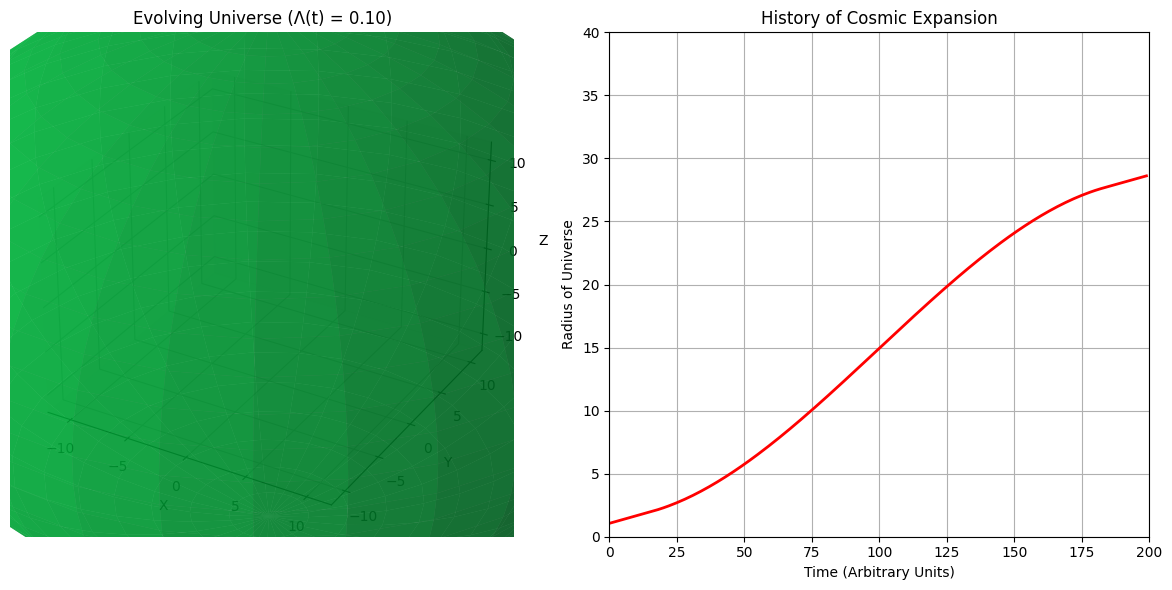

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# --- Setup the Figure and Subplots (3D and 2D) ---
fig = plt.figure(figsize=(12, 6))
ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
ax_2d = fig.add_subplot(1, 2, 2)

# --- Global State Variables ---
# Store the history of time and radius for the 2D plot
time_history = []
radius_history = []
# The scale factor 'a(t)' of the universe
global_scale = 1.0
total_frames = 200

def lambda_of_time(frame, total_frames):
    """
    Models an evolving, always-positive cosmological constant that
    rises and then falls, based on hints from cosmological surveys.
    """
    # Map frame number to a value 't' that goes from -2 to 2
    t = 4 * (frame / total_frames) - 2
    # A parabola shifted up so it's always positive. It peaks at t=0.
    lambda_val = 1.5 - 0.5 * (t**2)
    return max(0.1, lambda_val) # Ensure lambda never goes to zero or negative

def init():
    """Initializes the plots."""
    # Setup for 3D plot
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_xlim(-12, 12)
    ax_3d.set_ylim(-12, 12)
    ax_3d.set_zlim(-12, 12)

    # Setup for 2D plot
    ax_2d.set_xlim(0, total_frames)
    ax_2d.set_ylim(0, 40) # Estimated max radius
    ax_2d.set_xlabel('Time (Arbitrary Units)')
    ax_2d.set_ylabel('Radius of Universe')
    ax_2d.set_title('History of Cosmic Expansion')
    ax_2d.grid(True)

    # Return an empty list of artists
    return []

def update(frame):
    """Update function for the animation."""
    global global_scale

    # 1. Get the evolving cosmological constant for the current time
    lambda_val = lambda_of_time(frame, total_frames)

    # 2. Calculate the expansion drive from Lambda
    expansion_drive = 0.05 + (lambda_val * 0.1)
    global_scale += expansion_drive

    # 3. Store the history for the 2D plot
    time_history.append(frame)
    radius_history.append(global_scale)

    # --- Update the 3D Plot (Expanding Sphere) ---
    ax_3d.clear()
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_xlim(-12, 12)
    ax_3d.set_ylim(-12, 12)
    ax_3d.set_zlim(-12, 12)

    # Generate sphere coordinates
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 30)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # The color of the sphere can represent the strength of dark energy
    color_intensity = min(1.0, 0.2 + lambda_val / 2.0)
    sphere_color = (0, 1 - color_intensity, color_intensity) # Fades from cyan to blue

    ax_3d.plot_surface(
        global_scale * x,
        global_scale * y,
        global_scale * z,
        color=sphere_color,
        alpha=0.7
    )
    ax_3d.set_title(f'Evolving Universe (Λ(t) = {lambda_val:.2f})')

    # --- Update the 2D Plot (Radius History) ---
    ax_2d.clear()
    ax_2d.set_xlim(0, total_frames)
    ax_2d.set_ylim(0, 40)
    ax_2d.set_xlabel('Time (Arbitrary Units)')
    ax_2d.set_ylabel('Radius of Universe')
    ax_2d.set_title('History of Cosmic Expansion')
    ax_2d.grid(True)
    ax_2d.plot(time_history, radius_history, color='r', lw=2)

    # Return an empty list of artists
    return []

# --- Create, save, and show the animation ---
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=False, interval=50)

print("Saving animation of evolving universe... This may take a moment.")
ani.save('evolving_universe_with_plot.mp4', writer='ffmpeg', fps=20, dpi=120)
print("Animation saved successfully as evolving_universe_with_plot.mp4")

plt.tight_layout()
plt.show()
